In [2]:
import pandas as pd
import glob
import os
import random

# Read pickle source data file and convert to dataframe

In [3]:
# Specify the file path for the pickle file
pickle_file_path = 'merged_df.pkl'

# Read the pickle file and convert it to a DataFrame
merged_df = pd.read_pickle(pickle_file_path)

In [4]:
data_list = merged_df.values.tolist()

In [5]:
len(data_list)

269720

In [6]:
review_list = [entry[2] for entry in data_list]

In [7]:
review_list[0]

"This is not the best marvel film ever as some are saying, but it is also isn't the best. The acting at times is wooden. This film is very dull aswell. The jokes are very painful (what are those) to sit through. There are some good aspects of the film like Michael B Jordan as Kilgmonger and some of the action scenes. A lot of the characters aren't given much to do. For example Martin Freeman just shows up and does nothing important to the story. Chadwick Boseman also doesnt really do anything overall. Overall this film is nothing it is not com pletely terrible but is just anothe cookie cutter marvel film."

# TF-IDF and LDA for Topic Modeling

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vocab_size = 1000

# Define additional stopwords
additional_stopwords = ['br', 'movie', 'film']

# Combine the default English stopwords with additional stopwords
stop_words = CountVectorizer(stop_words='english').get_stop_words()
stop_words = stop_words.union(additional_stopwords)

# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                stop_words=stop_words,
                                max_features=vocab_size)
tf = tf_vectorizer.fit_transform(review_list)

In [11]:
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)

LatentDirichletAllocation(random_state=0)

In [12]:
import numpy as np
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])

In [13]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
bond : 0.034581981471820275
story : 0.022531999789042172
disney : 0.01597978057335775
animation : 0.01585516620100675
characters : 0.013753683632090065
pixar : 0.012424157049563234
animated : 0.012420310915955106
like : 0.012159333732236164
li : 0.011208338264584863
kids : 0.01076822662847119
films : 0.010767196154917513
great : 0.010280659943467777
new : 0.009457365234226687
love : 0.0093445061705097
toy : 0.008872571725870316
ul : 0.008673566776088519
good : 0.008614394548389828
just : 0.008436777574856629
craig : 0.008355449113765276
best : 0.007945492555481345

[Topic 1]
life : 0.02160446524836914
people : 0.018957347994486305
like : 0.014394728111133974
love : 0.014209619788298194
just : 0.011612595722708048
world : 0.010952473315225978
man : 0.010071726098025315
way : 0.009664144511890668
time : 0.009149093030207884
think : 0.007189215748152775
real : 0.007047284912872429
end : 0.00684362

C:\Users\PZZNVD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# WordCloud Visualization of topics

C:\Users\PZZNVD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


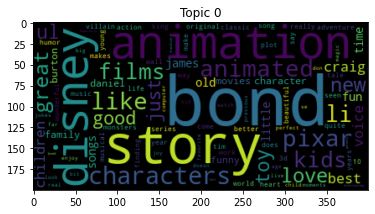

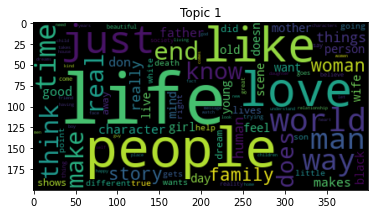

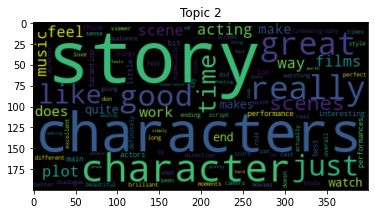

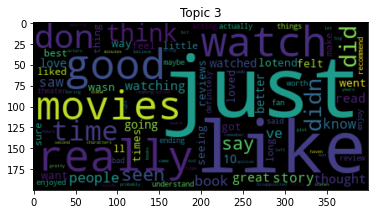

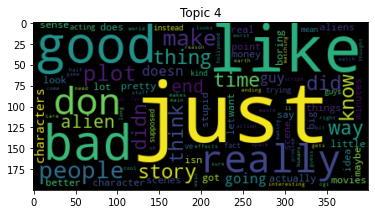

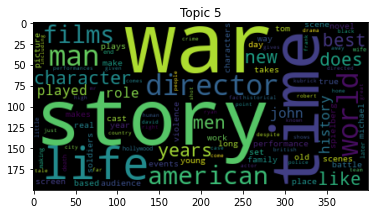

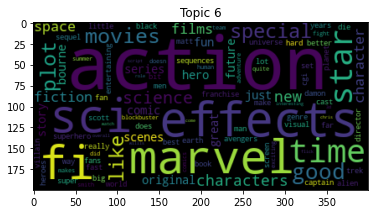

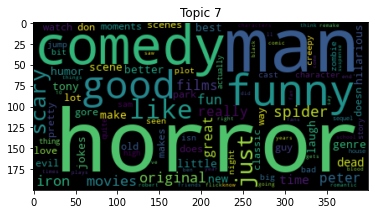

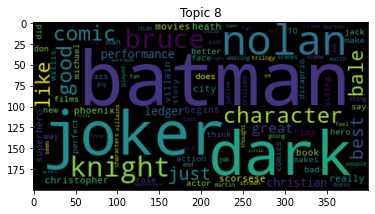

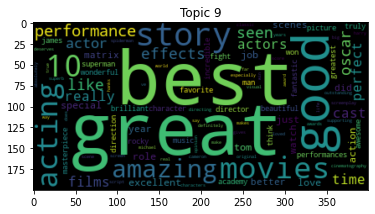

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)